In [ ]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# Load spaCy Model
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Step 2: Named Entity Recognition with spaCy
sample_text = "Barack Obama was born in Hawaii. He was the 44th President of the United States. Apple Inc. is a technology company headquartered in Cupertino."

print("\nProcessing Text with spaCy:")
doc = nlp(sample_text)

print("\nExtracted Named Entities:")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)


Processing Text with spaCy:

Extracted Named Entities:
Barack Obama (PERSON)
Hawaii (GPE)
44th (ORDINAL)
the United States (GPE)
Apple Inc. (ORG)
Cupertino (GPE)


In [ ]:
## Step 3: NER with NLTK
# NLTK does not have a built-in NER model but provides a pre-trained model
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

# Tokenize and Tag
nltk_tokens = word_tokenize(sample_text)
pos_tags = pos_tag(nltk_tokens)

# Named Entity Chunking
print("\nNamed Entity Chunking with NLTK:")
ne_tree = ne_chunk(pos_tags)
for subtree in ne_tree:
    if isinstance(subtree, Tree):
        entity_name = " ".join([token for token, pos in subtree.leaves()])
        entity_type = subtree.label()
        print(f"{entity_name} ({entity_type})")


Named Entity Chunking with NLTK:
Barack (PERSON)
Obama (PERSON)
Hawaii (GPE)
United States (GPE)
Apple Inc. (PERSON)
Cupertino (GPE)


In [ ]:
## Step 4: Custom NER Training with spaCy
# Task 1: Prepare training data and train a custom NER model
# Enhanced Training Function for Custom NER Model
def train_custom_ner_model(train_data):
    from spacy.training.example import Example
    from spacy.util import minibatch

    ner_model = spacy.blank("en")  # Create a blank model
    ner = ner_model.add_pipe("ner", last=True)  # Add NER pipe

    for _, annotations in train_data:
        for ent in annotations["entities"]:
            ner.add_label(ent[2])  # Add entity labels

    optimizer = ner_model.begin_training()

    for i in range(20):  # Train for 20 iterations
        losses = {}
        batches = minibatch(train_data, size=2)
        for batch in batches:
            texts, annotations = zip(*batch)
            examples = [Example.from_dict(ner_model.make_doc(text), ann) for text, ann in zip(texts, annotations)]
            ner_model.update(examples, drop=0.5, losses=losses)
        print(f"Iteration {i+1}, Losses: {losses}")

    return ner_model

TRAIN_DATA = [
    ("Google is a tech company in Mountain View.", {"entities": [(0, 6, "ORG"), (29, 42, "GPE")]}),
    ("Elon Musk is the CEO of SpaceX.", {"entities": [(0, 9, "PERSON"), (26, 32, "ORG")]}),
    ("The Eiffel Tower is in Paris.", {"entities": [(4, 17, "LOC"), (23, 28, "GPE")]}),
    ("Tesla's headquarters is in Palo Alto.", {"entities": [(0, 5, "ORG"), (27, 36, "GPE")]}),
    ("Amazon is hiring engineers in Seattle.", {"entities": [(0, 6, "ORG"), (33, 40, "GPE")]}),
]

print("\nTraining Custom NER Model:")
custom_ner_model = train_custom_ner_model(TRAIN_DATA)

custom_ner_model.to_disk("custom_ner_model")
print("Custom NER model saved.")

loaded_model = spacy.load("custom_ner_model")

def test_custom_ner_model(model, test_texts):
    results = {}
    for text in test_texts:
        doc = model(text)
        results[text] = [(ent.text, ent.label_) for ent in doc.ents]
    return results

test_sentences = [
    "Tesla is building new factories in Texas.",
    "Elon Musk is visiting Berlin.",
    "Amazon's revenue grew in Seattle.",
    "The Eiffel Tower is a popular tourist spot.",
]

print("\nTesting Custom NER Model:")
test_results = test_custom_ner_model(loaded_model, test_sentences)
for sentence, entities in test_results.items():
    print(f"Sentence: {sentence}")
    print(f"Extracted Entities: {entities}")



Training Custom NER Model:


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Google is a tech company in Mountain View." with entities "[(0, 6, 'ORG'), (29, 42, 'GPE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Elon Musk is the CEO of SpaceX." with entities "[(0, 9, 'PERSON'), (26, 32, 'ORG')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The Eiffel Tower is in Paris." with entities "[(4, 

Iteration 1, Losses: {'ner': 28.718449659645557}
Iteration 2, Losses: {'ner': 27.241526417434216}
Iteration 3, Losses: {'ner': 25.113043192774057}
Iteration 4, Losses: {'ner': 22.66611649468541}
Iteration 5, Losses: {'ner': 18.42101341485977}
Iteration 6, Losses: {'ner': 15.83099707402289}
Iteration 7, Losses: {'ner': 12.16064681764692}
Iteration 8, Losses: {'ner': 10.600419278722256}
Iteration 9, Losses: {'ner': 10.49789290503577}
Iteration 10, Losses: {'ner': 10.43830573281619}
Iteration 11, Losses: {'ner': 10.19265107645921}
Iteration 12, Losses: {'ner': 9.22260565651959}
Iteration 13, Losses: {'ner': 10.270963715769994}
Iteration 14, Losses: {'ner': 8.116565628406988}
Iteration 15, Losses: {'ner': 7.718607530807276}
Iteration 16, Losses: {'ner': 7.88447382586228}
Iteration 17, Losses: {'ner': 7.238841754155189}
Iteration 18, Losses: {'ner': 6.362834043412538}
Iteration 19, Losses: {'ner': 6.467058458586507}
Iteration 20, Losses: {'ner': 5.593238602101849}
Custom NER model saved.

T

In [ ]:
## Step 5: Text Preprocessing for Sentiment Analysis
# Task 2: Write functions for preprocessing textby lemmatizing and removing stopwords
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.text.lower() not in stop_words and token.is_alpha]
    return " ".join(tokens)

text_data = [
    "I love programming in Python!",
    "The weather today is terrible.",
    "I had an amazing time at the concert last night!",
    "The movie was not good at all.",
]

preprocessed_texts = [preprocess_text(text) for text in text_data]
print("\nPreprocessed Texts:")
print(preprocessed_texts)


Preprocessed Texts:
['love programming python', 'weather today terrible', 'amazing time concert last night', 'movie good']



Word Frequency Analysis:
love           1
programming    1
python         1
weather        1
today          1
Name: count, dtype: int64


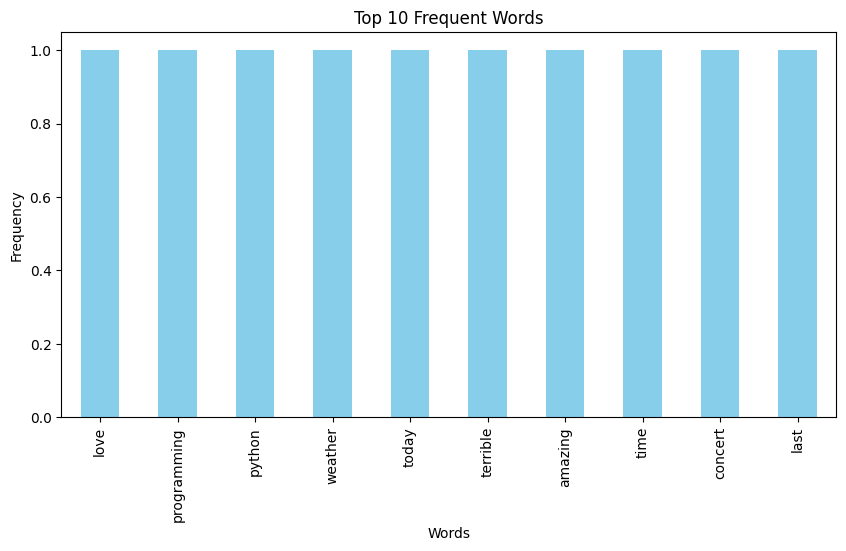

In [ ]:
## Step 6: Word Frequency Analysis
# Task 3: Analyze word frequency and plot results
def analyze_word_frequency(texts):
    all_words = " ".join(texts).split()
    word_freq = pd.Series(all_words).value_counts()
    return word_freq

word_freq = analyze_word_frequency(preprocessed_texts)
print("\nWord Frequency Analysis:")
print(word_freq.head())

plt.figure(figsize=(10, 5))
word_freq.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## Step 7: Preparing for Twitter Sentiment Analysis
# Task 4: Write a function to clean tweets by removing mentions, links, special characters, lowercase and strips
import re

def clean_tweet(tweet):
    tweet = re.sub(r"@\w+", "", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = tweet.lower().strip()
    return tweet

sample_tweets = [
    "@user I love the new design! Check it out: https://example.com",
    "This is the worst product ever. Total waste of money! #fail",
    "Great job by the team on the latest release! #innovation",
]

cleaned_tweets = [clean_tweet(tweet) for tweet in sample_tweets]
print("\nCleaned Tweets:")
print(cleaned_tweets)


Cleaned Tweets:
['i love the new design check it out', 'this is the worst product ever total waste of money fail', 'great job by the team on the latest release innovation']


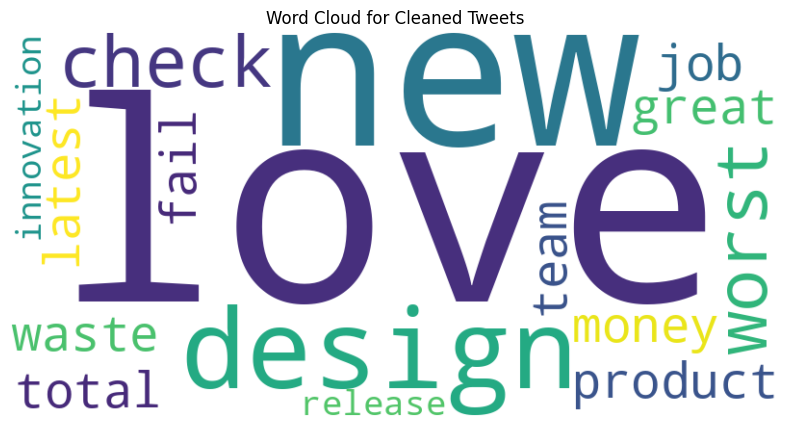

In [ ]:
# Step 8: Extract and analyze bigrams (pairs of words) and trigrams (triplets of words) from the cleaned tweets to find common patterns or phrases.
from wordcloud import WordCloud

def generate_word_cloud(texts, title):
    combined_text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

generate_word_cloud(cleaned_tweets, "Word Cloud for Cleaned Tweets")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_ngrams(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(texts)
    ngram_freq = pd.Series(ngrams.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
    return ngram_freq

bigrams = extract_ngrams(cleaned_tweets, n=2)
trigrams = extract_ngrams(cleaned_tweets, n=3)

print("\nTop Bigrams:")
print(bigrams.nlargest(5))
print("\nTop Trigrams:")
print(trigrams.nlargest(5))


Top Bigrams:
by the          1
check it        1
design check    1
ever total      1
great job       1
dtype: int64

Top Trigrams:
by the team         1
check it out        1
design check it     1
ever total waste    1
great job by        1
dtype: int64


In [ ]:
#step 9
# Task 6: Use a basic scoring function based on the presence of positive and negative words and print whether cleaned tweets are positive or negative
positive_words = {"love", "great", "amazing", "awesome", "good"}
negative_words = {"worst", "bad", "terrible", "fail", "waste"}

def simple_sentiment_score(tweet):
    words = set(tweet.split())
    score = sum(1 for word in words if word in positive_words) - sum(1 for word in words if word in negative_words)
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

# Assign sentiment scores to cleaned tweets
sentiment_scores = [simple_sentiment_score(tweet) for tweet in cleaned_tweets]
print("\nSentiment Scores:")
print(sentiment_scores)



Sentiment Scores:
['Positive', 'Negative', 'Positive']
